In [1]:
%load_ext watermark
%watermark

2020-09-07T14:34:43-05:00

CPython 3.7.6
IPython 7.13.0

compiler   : GCC 7.3.0
system     : Linux
release    : 5.4.0-45-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


## Agrupación de variables
En esta parte vamos a mirar que variables de pueden clasificar en grupos más genericos para hacer un análisis exhaustivo

In [2]:
import pandas as pd

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,12)

In [4]:
vehiculos = pd.read_csv("vehiculos.2.limpio_analisis.csv")
vehiculos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500


agrupando las variables en grupos más genericos

In [5]:
def valores_unicos(df):
    for columna in df:
        print("{} | {} | {}".format(
            df[columna].name, len(df[columna].unique()), df[columna].dtype
        ))

valores_unicos(vehiculos)

fabricante | 129 | object
modelo | 3734 | object
year | 35 | int64
desplazamiento | 66 | float64
cilindros | 10 | float64
transmision | 38 | object
traccion | 8 | object
clase | 34 | object
combustible | 13 | object
consumo | 49 | int64
co2 | 596 | float64


Se pueden agrupar algunas variables como:
* tracción
* combustible
* transmisión
* clase

### Clase de vehiculo

In [6]:
vehiculos.clase.unique()

array(['Special Purpose Vehicle 2WD', 'Midsize Cars', 'Subcompact Cars',
       'Compact Cars', 'Sport Utility Vehicle - 4WD',
       'Small Sport Utility Vehicle 2WD',
       'Small Sport Utility Vehicle 4WD', 'Two Seaters',
       'Sport Utility Vehicle - 2WD', 'Special Purpose Vehicles',
       'Special Purpose Vehicle 4WD', 'Small Station Wagons',
       'Minicompact Cars', 'Midsize-Large Station Wagons',
       'Midsize Station Wagons', 'Large Cars',
       'Standard Sport Utility Vehicle 4WD',
       'Standard Sport Utility Vehicle 2WD', 'Minivan - 4WD',
       'Minivan - 2WD', 'Vans', 'Vans, Cargo Type',
       'Vans, Passenger Type', 'Standard Pickup Trucks 2WD',
       'Standard Pickup Trucks', 'Standard Pickup Trucks/2wd',
       'Small Pickup Trucks 2WD', 'Standard Pickup Trucks 4WD',
       'Small Pickup Trucks 4WD', 'Small Pickup Trucks', 'Vans Passenger',
       'Special Purpose Vehicle', 'Special Purpose Vehicles/2wd',
       'Special Purpose Vehicles/4wd'], dtype=object

In [7]:
pequeno = ["Compact Cars","Subcompact Cars","Two Seaters","Minicompact Cars"]
mediano = ["Midsize Cars"]
grande = ["Large Cars"]

vehiculos.loc[vehiculos.clase.isin(pequeno), "clase_tipo"] = "Coches Pequeños"
vehiculos.loc[vehiculos.clase.isin(mediano), "clase_tipo"] = "Coches Medianos"
vehiculos.loc[vehiculos.clase.isin(grande), "clase_tipo"] = "Coches Grandes"
vehiculos.loc[vehiculos.clase.str.contains("Truck"), "clase_tipo"] = "Camionetas"
vehiculos.loc[vehiculos.clase.str.contains("Van"), "clase_tipo"] = "Furgoneta"
vehiculos.loc[vehiculos.clase.str.contains("Special Purpose"), "clase_tipo"] = "Vehiculos Especiales"
vehiculos.loc[vehiculos.clase.str.contains("Station"), "clase_tipo"] = "Vehiculos Familiares"

In [8]:
vehiculos.clase_tipo = vehiculos.clase_tipo.astype("category")

In [9]:
vehiculos.clase_tipo.value_counts(normalize=True)

Coches Pequeños         0.418016
Camionetas              0.174798
Coches Medianos         0.136939
Vehiculos Familiares    0.081405
Vehiculos Especiales    0.071153
Coches Grandes          0.059037
Furgoneta               0.058651
Name: clase_tipo, dtype: float64

### Tracción del vehiculo

In [10]:
vehiculos.traccion.unique()

array(['2-Wheel Drive', 'Rear-Wheel Drive', 'Front-Wheel Drive',
       '4-Wheel or All-Wheel Drive', 'All-Wheel Drive', nan,
       '4-Wheel Drive', 'Part-time 4-Wheel Drive'], dtype=object)

In [11]:
vehiculos["traccion_tipo"] = "dos"
vehiculos.loc[vehiculos.traccion.isin([
    "4-Wheel or All-Wheel Drive","All-Wheel Drive",
    "4-Wheel Drive", "Part-time 4-Wheel Drive"
]), "traccion_tipo"] = "cuatro"
vehiculos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,clase_tipo,traccion_tipo
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,Vehiculos Especiales,dos
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehiculos Especiales,dos
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,Vehiculos Especiales,dos
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehiculos Especiales,dos
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500,Coches Medianos,dos


In [12]:
vehiculos.traccion_tipo = vehiculos.traccion_tipo.astype("category")

### Transmisión

In [13]:
vehiculos.transmision.unique()

array(['Automatic 3-spd', 'Automatic 4-spd', 'Manual 5-spd',
       'Automatic (S5)', 'Manual 6-spd', 'Automatic 5-spd',
       'Automatic (AM8)', 'Automatic (AM-S8)', 'Automatic (AV-S7)',
       'Automatic (S6)', 'Automatic (S9)', 'Automatic (AM-S7)',
       'Automatic (S4)', 'Automatic (AM-S9)', 'Automatic (S7)',
       'Automatic (AM7)', 'Automatic (AM6)', 'Automatic 6-spd',
       'Automatic 8-spd', 'Manual 4-spd', 'Automatic (S8)',
       'Manual 7-spd', 'Automatic (AM-S6)', 'Auto(AM-S6)',
       'Automatic (variable gear ratios)', 'Automatic (AV-S8)',
       'Automatic (A1)', 'Automatic (AV-S6)', 'Manual 3-spd',
       'Automatic (S10)', 'Automatic 9-spd', 'Manual 4-spd Doubled', nan,
       'Automatic (L4)', 'Automatic (L3)', 'Automatic (AV-S10)',
       'Automatic 7-spd', 'Automatic (AM5)'], dtype=object)

In [14]:
vehiculos["transmision_tipo"] = "Automatica"
vehiculos.loc[vehiculos["transmision"].notnull() & vehiculos["transmision"].str.startswith("M"),
              "transmision_tipo"] = "Manual"
vehiculos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,clase_tipo,traccion_tipo,transmision_tipo
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,Vehiculos Especiales,dos,Automatica
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehiculos Especiales,dos,Automatica
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,Vehiculos Especiales,dos,Automatica
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehiculos Especiales,dos,Automatica
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500,Coches Medianos,dos,Automatica


In [15]:
vehiculos["transmision_tipo"].value_counts()

Automatica    24937
Manual        11854
Name: transmision_tipo, dtype: int64

### Combustible

In [16]:
vehiculos.combustible.value_counts()

Regular                        24078
Premium                        10206
Gasoline or E85                 1215
Diesel                           933
Premium or E85                   124
Midgrade                          77
CNG                               60
Premium and Electricity           30
Regular Gas and Electricity       20
Gasoline or natural gas           20
Premium Gas or Electricity        18
Gasoline or propane                8
Regular Gas or Electricity         2
Name: combustible, dtype: int64

In [17]:
vehiculos["combustible_tipo"] = "otros tipos de combustible"
vehiculos.loc[vehiculos.combustible == "Regular", "combustible_tipo"] = "Normal"
vehiculos.loc[vehiculos.combustible == "Premium", "combustible_tipo"] = "Premium"
vehiculos.loc[vehiculos.combustible.str.contains("Electricity"), "combustible_tipo"] = "Hibrido"
vehiculos.combustible_tipo.value_counts()

Normal                        24078
Premium                       10206
otros tipos de combustible     2437
Hibrido                          70
Name: combustible_tipo, dtype: int64

In [18]:
vehiculos["combustible_tipo"] = vehiculos["combustible_tipo"].astype("category")

In [19]:
vehiculos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,Vehiculos Especiales,dos,Automatica,Normal
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehiculos Especiales,dos,Automatica,Normal
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,Vehiculos Especiales,dos,Automatica,Normal
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehiculos Especiales,dos,Automatica,Normal
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500,Coches Medianos,dos,Automatica,Premium


## Agrupar variables continuas
Para agrupar variables continuas no se pueden utilizar las mismas funciones que para variables categoricas, para agrupar estas variables utilizamos los cuantiles

In [20]:
tipos_tam_motor = ["muy pequeño", "pequeño", "mediano", "grande", "muy grande"]
vehiculos["tamano_motor_tipo"] = pd.qcut(vehiculos["desplazamiento"],5,tipos_tam_motor)

In [21]:
tipos_consumo = ["muy bajo","bajo","medio","alto","muy alto"]
vehiculos["consumo_tipo"] = pd.qcut(vehiculos["consumo"],5,tipos_consumo)

In [22]:
tipos_co2 = ["muy bajo","bajo","medio","alto","muy alto"]
vehiculos["co2_tipo"] = pd.qcut(vehiculos["co2"],5,tipos_co2)

In [23]:
vehiculos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,Vehiculos Especiales,dos,Automatica,Normal,pequeño,bajo,alto
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehiculos Especiales,dos,Automatica,Normal,grande,muy bajo,muy alto
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,Vehiculos Especiales,dos,Automatica,Normal,pequeño,muy bajo,alto
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehiculos Especiales,dos,Automatica,Normal,grande,muy bajo,muy alto
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500,Coches Medianos,dos,Automatica,Premium,grande,muy bajo,alto


La relación entre consumo y co2 es inversa lo cual no tiene sentido porque entre más gasolina consuma un vehiculo más co2 debería emitir.

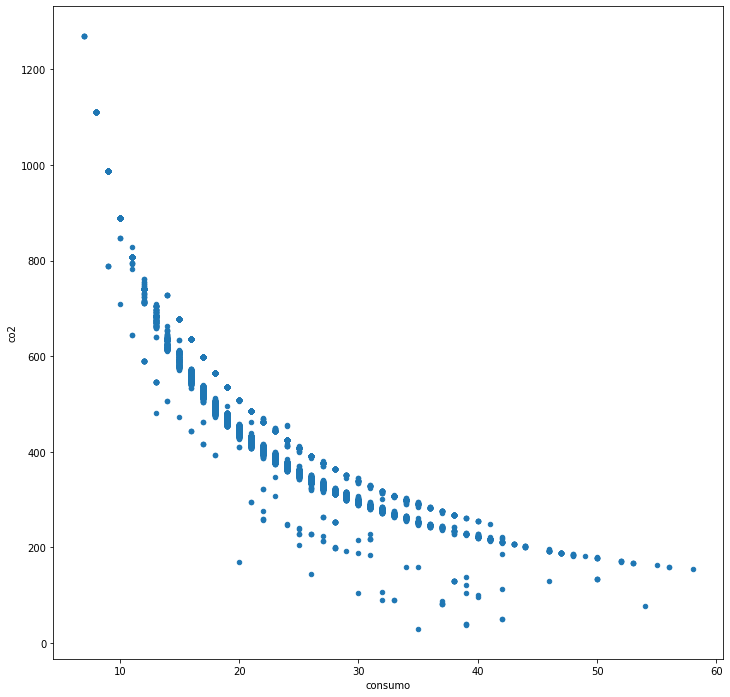

In [24]:
vehiculos.plot.scatter(x="consumo",y="co2")

In [25]:
vehiculos["consumo_litros_milla"] = 3.78541/vehiculos.consumo

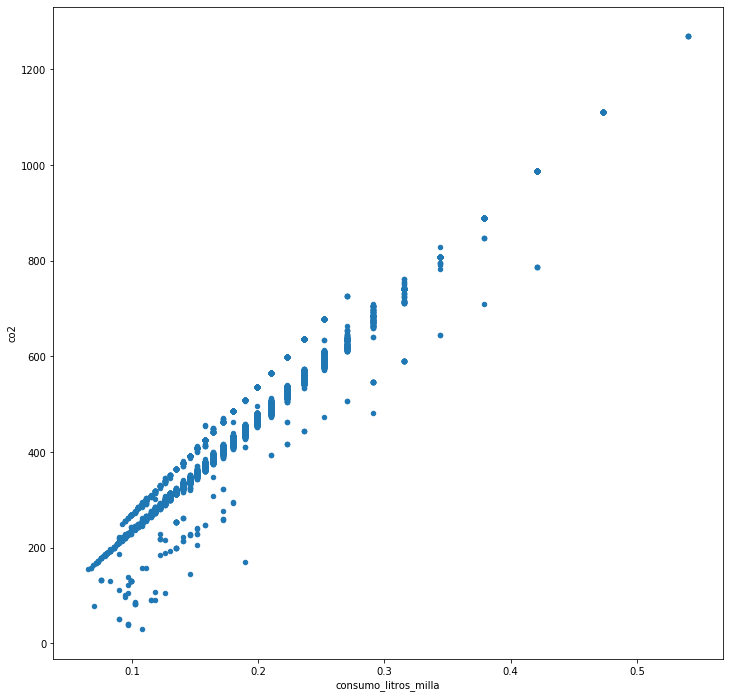

In [26]:
vehiculos.plot.scatter(x="consumo_litros_milla", y="co2")

In [27]:
tipos_consumo = ["muy bajo","bajo","medio","alto","muy alto"]
vehiculos["consumo_tipo"] = pd.qcut(vehiculos["consumo_litros_milla"],5,labels=tipos_consumo)
vehiculos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,Vehiculos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehiculos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,Vehiculos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehiculos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


In [28]:
vehiculos.consumo_tipo.head()

0        alto
1    muy alto
2        alto
3    muy alto
4        alto
Name: consumo_tipo, dtype: category
Categories (5, object): [muy bajo < bajo < medio < alto < muy alto]

In [29]:
vehiculos.dtypes

fabricante                object
modelo                    object
year                       int64
desplazamiento           float64
cilindros                float64
transmision               object
traccion                  object
clase                     object
combustible               object
consumo                    int64
co2                      float64
clase_tipo              category
traccion_tipo           category
transmision_tipo          object
combustible_tipo        category
tamano_motor_tipo       category
consumo_tipo            category
co2_tipo                category
consumo_litros_milla     float64
dtype: object

## Exportar
Para exportar datos en pasos intermedios, es más recomendable usar el formato pickle ya que este guarda los tipos de variables y otros metadatos que otros formatos no.

In [30]:
vehiculos.to_pickle("vehiculos.3.variables_agrupadas.pkl")